In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input


from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_dir='../fish-dataset/FishImgDataset/train'
test_dir='../fish-dataset/FishImgDataset/test'
val_dir='../fish-dataset/FishImgDataset/val'

In [4]:
# Define the input layer
input_layer = Input(shape=IMAGE_SIZE + [3])

In [5]:
# Add preprocessing layer
preprocessed = Lambda(preprocess_input)(input_layer)

In [6]:
# Load VGG16 model with pretrained ImageNet weights, without top layers
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
# Freeze the layers so they won't be trained
for layer in vgg.layers:
  layer.trainable = False

In [8]:
# For getting number of classes
folders = glob('../fish-dataset/FishImgDataset/train/*')
len(folders)

31

In [9]:
# Layers
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# Model object
model = Model(inputs=vgg.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 31)             │       777,759 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,492,447 (59.10 MB)

 Trainable params: 777,759 (2.97 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set= val_datagen.flow_from_directory(val_dir,
                                         target_size = (224, 224),
                                         batch_size = 32,
                                         class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8791 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.


In [14]:
# Model Training
FishModel = model.fit(
  training_set,
  validation_data=val_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks=[early_stop, checkpoint]
)


c:\Users\kengu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4034 - loss: 2.5734

275/275 ━━━━━━━━━━━━━━━━━━━━ 1253s 5s/step - accuracy: 0.4039 - loss: 2.5708 - val_accuracy: 0.7354 - val_loss: 0.9202
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7362 - loss: 0.9456

275/275 ━━━━━━━━━━━━━━━━━━━━ 1305s 5s/step - accuracy: 0.7362 - loss: 0.9456 - val_accuracy: 0.8313 - val_loss: 0.6029
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8167 - loss: 0.6451

275/275 ━━━━━━━━━━━━━━━━━━━━ 1322s 5s/step - accuracy: 0.8167 - loss: 0.6451 - val_accuracy: 0.8771 - val_loss: 0.4544
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1360s 5s/step - accuracy: 0.8573 - loss: 0.4972 - val_accuracy: 0.8644 - val_loss: 0.5038
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8587 - loss: 0.4766

275/275 ━━━━━━━━━━━━━━━━━━━━ 1266s 5s/step - accuracy: 0.8588 - loss: 0.4765 - val_accuracy: 0.9008 - val_loss: 0.3746
Epoch 6/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8818 - loss: 0.3935

275/275 ━━━━━━━━━━━━━━━━━━━━ 1279s 5s/step - accuracy: 0.8818 - loss: 0.3935 - val_accuracy: 0.9335 - val_loss: 0.2650
Epoch 7/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9117 - loss: 0.2993

275/275 ━━━━━━━━━━━━━━━━━━━━ 1246s 5s/step - accuracy: 0.9117 - loss: 0.2994 - val_accuracy: 0.9397 - val_loss: 0.2450
Epoch 8/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1188s 4s/step - accuracy: 0.9248 - loss: 0.2489 - val_accuracy: 0.9331 - val_loss: 0.2535
Epoch 9/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9244 - loss: 0.2411

275/275 ━━━━━━━━━━━━━━━━━━━━ 1290s 5s/step - accuracy: 0.9244 - loss: 0.2412 - val_accuracy: 0.9447 - val_loss: 0.2200
Epoch 10/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9304 - loss: 0.2308

275/275 ━━━━━━━━━━━━━━━━━━━━ 1120s 4s/step - accuracy: 0.9304 - loss: 0.2309 - val_accuracy: 0.9447 - val_loss: 0.2185


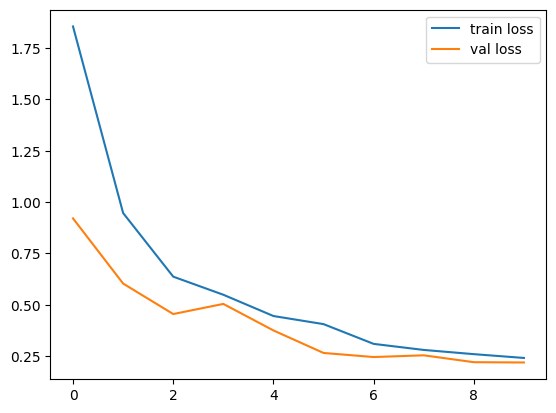

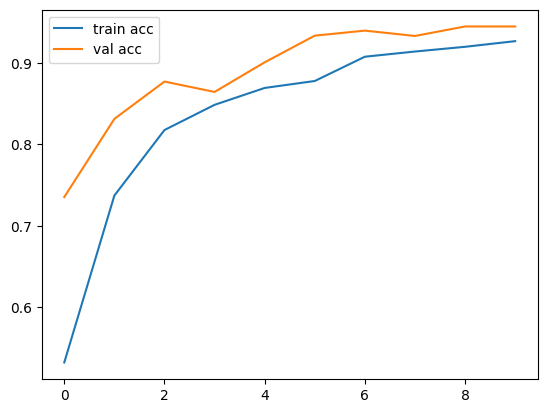

In [15]:
# loss
plt.plot(FishModel.history['loss'], label='train loss')
plt.plot(FishModel.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(FishModel.history['accuracy'], label='train acc')
plt.plot(FishModel.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [16]:
results = model.evaluate(test_set, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.33337
Test Accuracy: 92.39%


In [19]:
model_name = 'FishModel_VGG16.h5'
model.save(model_name, save_format='h5')
model.save_weights('model_weights_VGG16.weights.h5')

In [20]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('../src/FishModel_VGG16.h5',compile=False) 

In [21]:
class_name=['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin','Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 'Gourami', 'Grass Carp', 'Green Spotted Puffer',
            'Indian Carp', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish','Mosquito Fish', 'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 'Silver Carp',
            'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia']

In [24]:
import numpy as np
def predict(path):
    img=load_img(path,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    print(answer)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = class_name[y]
    return res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
[[6.8489062e-11 2.7360988e-13 1.1199348e-03 1.7609445e-12 4.3290679e-08
  7.8410663e-12 7.3144234e-12 2.7877051e-05 2.1140707e-10 1.4721349e-09
  4.0774681e-09 6.2314357e-05 2.3369503e-17 2.7077724e-06 1.8213807e-07
  1.0930941e-10 3.1465708e-09 6.7175991e-12 1.6768088e-16 1.2923724e-06
  1.0187119e-11 1.0953486e-09 6.5635756e-12 1.0566015e-10 2.0751342e-11
  2.7108044e-07 1.2190459e-14 2.1361033e-07 7.2846362e-10 1.5052283e-15
  9.9878520e-01]]


'Tilapia'

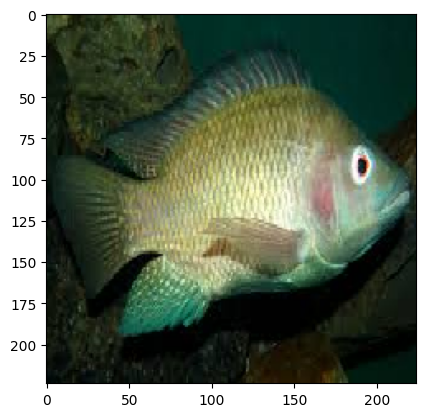

In [27]:
img='../tilapia.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
predict(img)